In [39]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector,TimeDistributed, Dense, Input

            Robberies
Month                
1966-01-01         41
1966-02-01         39
1966-03-01         50
1966-04-01         40
1966-05-01         43


<Axes: xlabel='Month'>

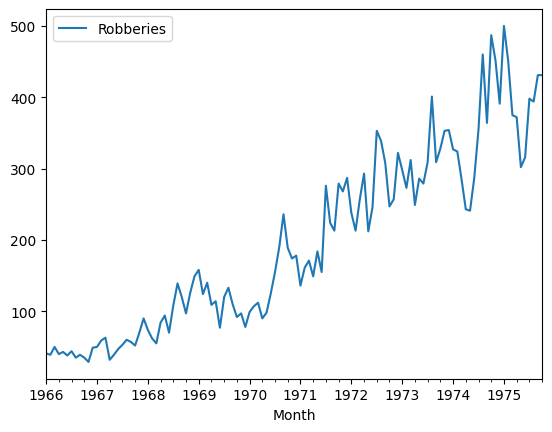

In [40]:

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
print(df.head())
df.plot()

In [41]:
max_value = max(df['Robberies'])
min_value = min(df['Robberies'])

def normalize_data(data):
    return (data - min_value) / (max_value - min_value)

def denormalize_data(data):
    return data * (max_value - min_value) + min_value

normalized_df = normalize_data(df['Robberies'])

n_features = 1
n_future = 20
n_past = 40

x = []
for i in range(len(normalized_df) - n_past + 1 - n_future):
    window = normalized_df.iloc[i:i+n_past].to_numpy().reshape(-1, 1)
    x.append(window)
x = np.array(x)

y = []
for i in range(n_future, len(normalized_df) - n_past + 1):
    window = normalized_df.iloc[i:i+n_future].to_numpy().reshape(-1, 1)
    y.append(window)
y = np.array(y)

train_size = 0.8
validation_size = 0.1
test_size = 0.1

indices = np.arange(min(len(x),len(y)))
np.random.shuffle(indices)
train_index = int(train_size * len(indices))
val_index = int((train_size + validation_size) * len(indices))

train_indices = indices[:train_index]
val_indices = indices[train_index:val_index]
test_indices = indices[val_index:]

x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

print("Number of samples in training set:", len(x_train))
print("Number of samples in validation set:", len(x_val))
print("Number of samples in test set:", len(x_test))

print(x_train.shape[0],x_train.shape[1],x_train.shape[2])
print(x_test.shape[0],x_test.shape[1],x_test.shape[2])
print(x_val.shape[0],x_val.shape[1],x_val.shape[2])

print(y_train.shape[0],y_train.shape[1],y_train.shape[2])
print(y_test.shape[0],y_test.shape[1],y_test.shape[2])
print(y_val.shape[0],y_val.shape[1],y_val.shape[2])

Number of samples in training set: 47
Number of samples in validation set: 6
Number of samples in test set: 6
47 40 1
6 40 1
6 40 1
47 20 1
6 20 1
6 20 1


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 1024)           │     4,202,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_3 (RepeatVector)  │ (None, 20, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 20, 1024)       │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 20, 1)          │         1,025 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,596,225 (48.05 MB)

 Trainable params: 12,596,225 (48.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 0.1109 - val_loss: 0.0393
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0398 - val_loss: 0.0557
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.0454 - val_loss: 0.0131
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0178 - val_loss: 0.0165
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.0154 - val_loss: 0.0117
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.0116 - val_loss: 0.0118
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0095 - val_loss: 0.0117
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0102 - val_loss: 0.0113
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.0079 - val_loss: 0.0095
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.0081 - val_loss: 0.0085
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0073 - val_loss: 0.0079
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.0071 - val_loss: 0.0076
Epoch 

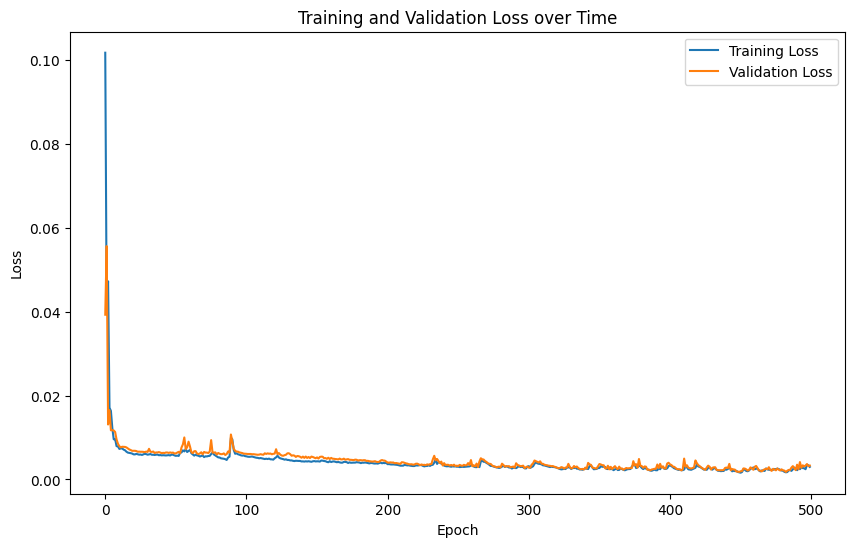

In [42]:
batch_size = 10
epochs = 1000
hidden_layer = 1024

model = Sequential()
model.add(LSTM(hidden_layer, activation='tanh', input_shape=(n_past, n_features)))
model.add(RepeatVector(n_future))
model.add(LSTM(hidden_layer, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Time')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


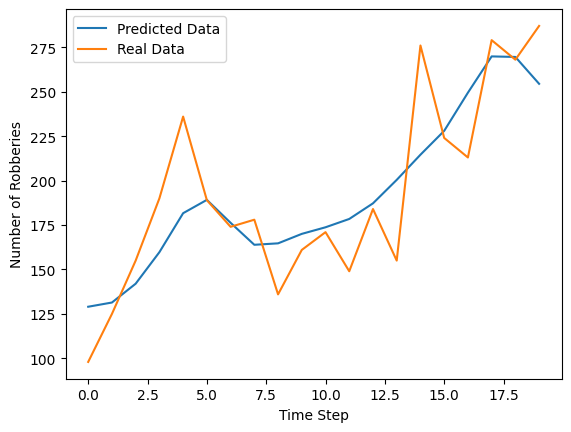

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


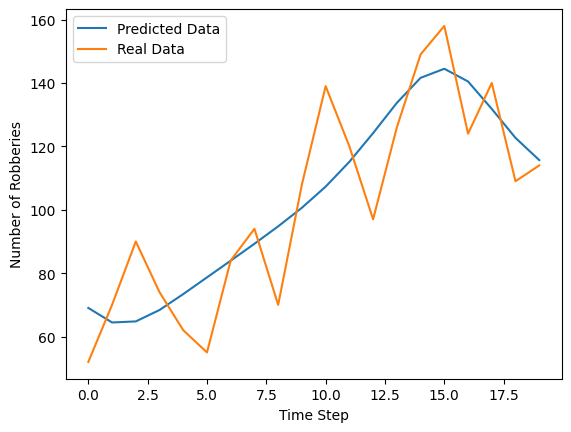

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


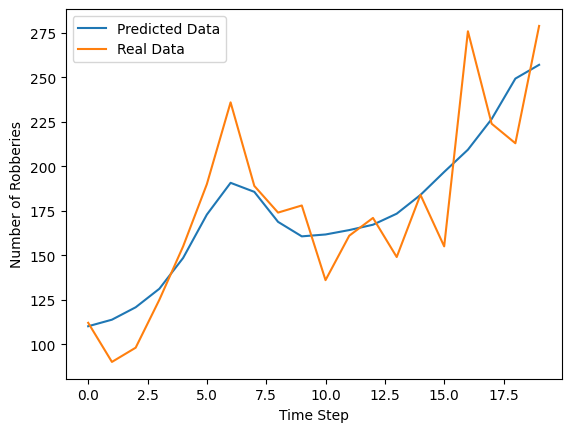

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


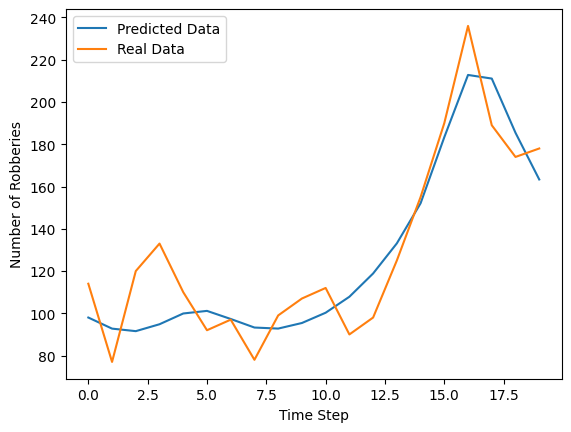

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


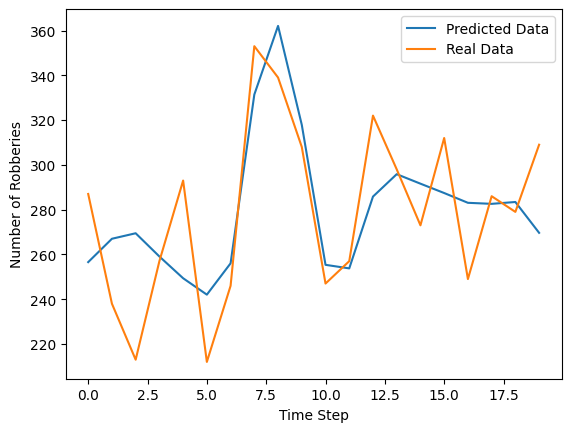

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


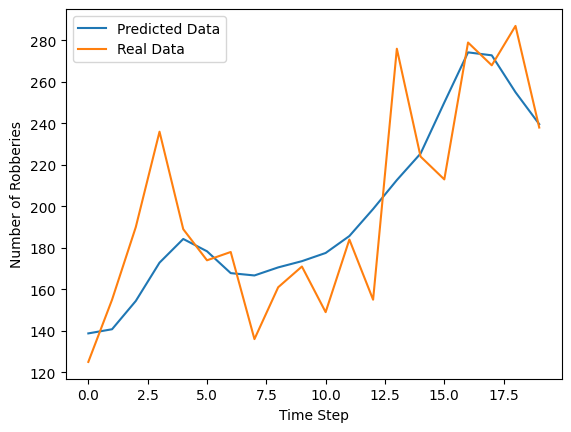

In [43]:
for i, x in enumerate(x_val):
    x = x.reshape(1,n_past,1)
    predicted = denormalize_data(model.predict(x)).flatten()
    real = denormalize_data(y_val[i].flatten())
    plt.plot(predicted, label='Predicted Data')
    plt.plot(real, label='Real Data')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Robberies')
    plt.legend()
    plt.show()